<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/titanics_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
pd.concat([df['Survived'].value_counts(),df['Survived'].value_counts(normalize=True)],axis=1,
          keys=['num','percentage'])

,num,percentage
Survived,,
0,549,0.616162
1,342,0.383838


In [8]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.


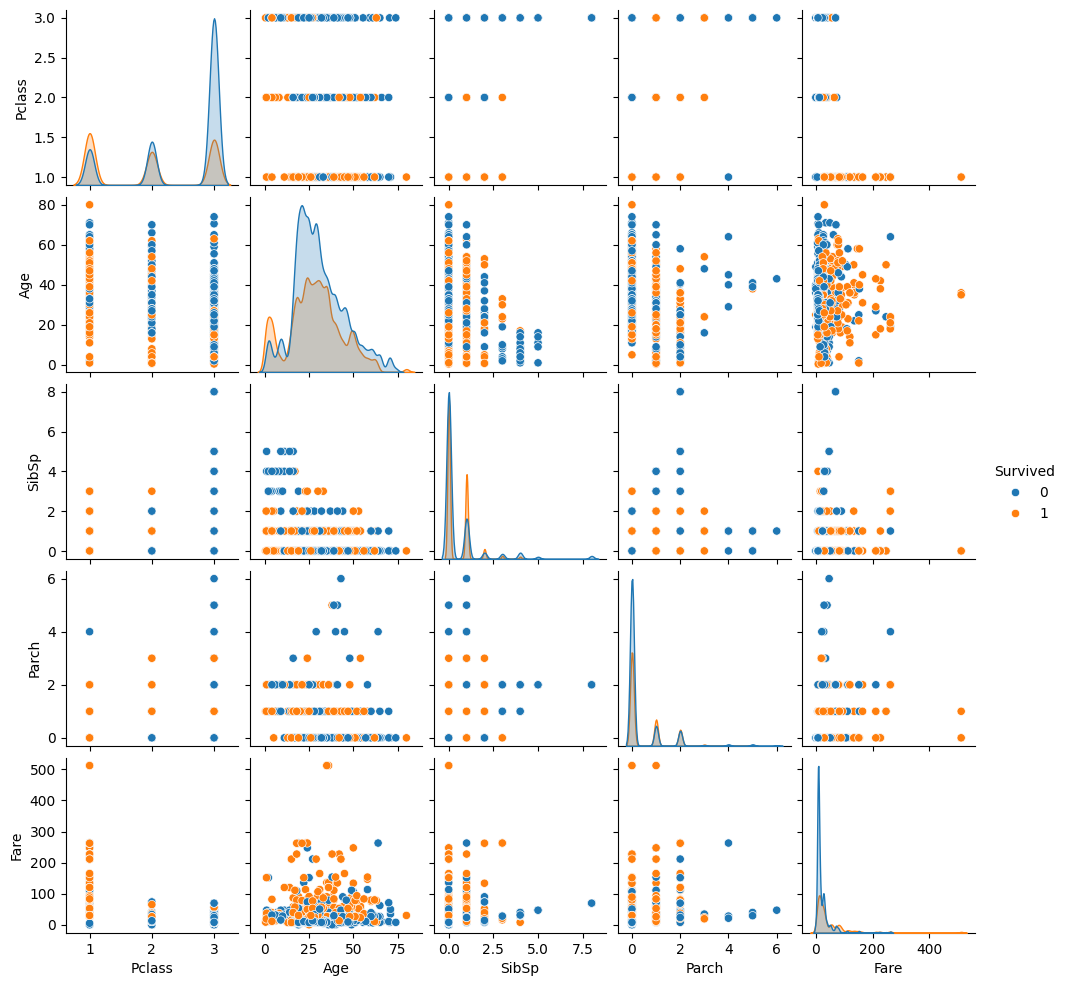

In [10]:
#檢視變數關係
sns.pairplot(data=df,hue='Survived',size=2,diag_kws={'bw':0.1})

In [11]:
x_col_num = ['Age','SibSp','Parch','Fare']
x_col_cat = ['Pclass','Sex','Embarked']
x_cols = x_col_num + x_col_cat
y_col = 'Survived'

In [12]:
#處理數值
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pl = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())

print(f'numerical data:{x_col_num}')
num_pl.fit_transform(df[x_col_num])[:3]

numerical data:['Age', 'SibSp', 'Parch', 'Fare']


array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426]])

In [13]:
#處理類別
from sklearn.preprocessing import OneHotEncoder
cat_pl = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False))

print(f'categorical data:{x_col_cat}')
cat_pl.fit_transform(df[x_col_cat])[:3]

categorical data:['Pclass', 'Sex', 'Embarked']


array([[0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1.]])

In [14]:
#取得讀熟編碼欄位
oh = cat_pl.named_steps['onehotencoder']
oh_cols = oh.get_feature_names_out(x_col_cat)
print(oh_cols)

['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S']


In [15]:
#整合讀熟編碼與其他欄位
pd.DataFrame(cat_pl.fit_transform(df[x_col_cat]),columns=oh_cols)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [16]:
from sklearn.compose import make_column_transformer
data_pl = ColumnTransformer([
    ('num_pl',num_pl,x_col_num),
    ('cat_pl',cat_pl,x_col_cat)]
)
data_pl.fit_transform(df[x_cols])[:1].round(2)

array([[-0.57,  0.43, -0.47, -0.5 ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ]])

In [17]:
x = df[x_cols]
y = df[y_col]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
#SVM
from sklearn.svm import SVC
model_pl_svc = make_pipeline(data_pl,SVC())
model_pl_svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('svc', SVC())])

In [19]:
model_pl_svc.fit(x_train,y_train)
y_pred = model_pl_svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accurarcy rate:',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       175
           1       0.84      0.73      0.78       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295

[[158  17]
 [ 32  88]]
accurarcy rate: 0.8338983050847457


In [21]:
#logistic prediction
from sklearn.linear_model import LogisticRegression
model_pl_lr = make_pipeline(data_pl,LogisticRegression())
model_pl_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('logisticregression', LogisticRegression())])

In [22]:
model_pl_lr.fit(x_train,y_train)
y_pred = model_pl_lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accurarcy rate:',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

[[154  21]
 [ 35  85]]
accurarcy rate: 0.8101694915254237


In [25]:
#將類別型移動至數值型管道
data_pl = ColumnTransformer([
    ('num_pl',num_pl,['Age','SibSp','Parch','Fare','Pclass']),
    ('cat_pl',cat_pl,['Sex','Embarked'])
])

In [26]:
#選出重要特徵值的功能加入管道器
from sklearn.feature_selection import SelectKBest,f_classif
data_pl = ColumnTransformer([
    ('num_pl',num_pl,x_col_num),
    ('cat_pl',cat_pl,x_col_cat)
])
model_pl_svc = make_pipeline(data_pl,SelectKBest(f_classif,k=3),SVC())
model_pl_svc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat_pl',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('selectkbest', SelectKBest(k=3)), ('svc', SVC())])

In [28]:
model_pl_svc.fit(x_train,y_train)
y_pred = model_pl_svc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accurarcy rate:',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       175
           1       0.92      0.48      0.63       120

    accuracy                           0.77       295
   macro avg       0.83      0.73      0.73       295
weighted avg       0.81      0.77      0.75       295

[[170   5]
 [ 62  58]]
accurarcy rate: 0.7728813559322034


In [30]:
#輸出重要特徵值
cols = x_col_num + oh_cols.tolist()
selector = model_pl_svc.named_steps['selectkbest']
pd.DataFrame({'feature':cols,'score':selector.scores_})

,feature,score
0,Age,1.508458
1,SibSp,1.740700
2,Parch,2.807284
3,Fare,35.374998
4,Pclass_1,38.384799
5,Pclass_2,9.138272
6,Pclass_3,62.700324
7,Sex_female,228.852503
8,Sex_male,228.852503
9,Embarked_C,22.317622


In [31]:
np.array(cols)[selector.get_support()]

array(['Pclass_3', 'Sex_female', 'Sex_male'], dtype='<U10')

In [32]:
#kbinsdiscretizer